## Importing the necessary libraries 

In [2]:
import warnings
warnings.filterwarnings ("ignore")

In [3]:
import numpy as np
import pandas as pd

In [4]:
pd.set_option("display.max_rows", 2500) #For displaying maximum rows in output
pd.set_option("display.max_columns", 100) #For displaying maximum columns in output
pd.set_option('display.float_format', lambda x: '%.5f' % x) #For displaying upto 5 decimal places only

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels
import statsmodels.api as sm
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression

## 1. Reading the Lead Score data 

In [16]:
lead_df=pd.read_csv("Leads.csv")
lead_df.head(5)

Prospect ID  Lead Number              Lead Origin  \
0  7927b2df-8bba-4d29-b9a2-b6e0beafe620       660737                      API   
1  2a272436-5132-4136-86fa-dcc88c88f482       660728                      API   
2  8cc8c611-a219-4f35-ad23-fdfd2656bd8a       660727  Landing Page Submission   
3  0cc2df48-7cf4-4e39-9de9-19797f9b38cc       660719  Landing Page Submission   
4  3256f628-e534-4826-9d63-4a8b88782852       660681  Landing Page Submission   

      Lead Source Do Not Email Do Not Call  Converted  TotalVisits  \
0      Olark Chat           No          No          0      0.00000   
1  Organic Search           No          No          0      5.00000   
2  Direct Traffic           No          No          1      2.00000   
3  Direct Traffic           No          No          0      1.00000   
4          Google           No          No          1      2.00000   

   Total Time Spent on Website  Page Views Per Visit            Last Activity  \
0                            0               0.00000  Page Visited on Website   
1                          674               2.50000             Email Opened   
2                         1532               2.00000             Email Opened   
3                          305               1.00000              Unreachable   
4                         1428               1.00000        Converted to Lead   

  Country           Specialization How did you hear about X Education  \
0     NaN                   Select                             Select   
1   India                   Select                             Select   
2   India  Business Administration                             Select   
3   India    Media and Advertising                      Word Of Mouth   
4   India                   Select                              Other   

  What is your current occupation  \
0                      Unemployed   
1                      Unemployed   
2                         Student   
3                      Unemployed   
4                      Unemployed   

  What matters most to you in choosing a course Search Magazine  \
0                       Better Career Prospects     No       No   
1                       Better Career Prospects     No       No   
2                       Better Career Prospects     No       No   
3                       Better Career Prospects     No       No   
4                       Better Career Prospects     No       No   

  Newspaper Article X Education Forums Newspaper Digital Advertisement  \
0                No                 No        No                    No   
1                No                 No        No                    No   
2                No                 No        No                    No   
3                No                 No        No                    No   
4                No                 No        No                    No   

  Through Recommendations Receive More Updates About Our Courses  \
0                      No                                     No   
1                      No                                     No   
2                      No                                     No   
3                      No                                     No   
4                      No                                     No   

                                  Tags      Lead Quality  \
0          Interested in other courses  Low in Relevance   
1                              Ringing               NaN   
2  Will revert after reading the email          Might be   
3                              Ringing          Not Sure   
4  Will revert after reading the email          Might be   

  Update me on Supply Chain Content Get updates on DM Content    Lead Profile  \
0                                No                        No          Select   
1                                No                        No          Select   
2                                No                        No  Potential Lead   
3                            

### 1.1 Looking at basic attributes of the data

In [17]:
lead_df.shape

(9240, 37)

In [18]:
lead_df.describe()

Lead Number  Converted  TotalVisits  Total Time Spent on Website  \
count   9240.00000 9240.00000   9103.00000                   9240.00000   
mean  617188.43561    0.38539      3.44524                    487.69827   
std    23405.99570    0.48671      4.85485                    548.02147   
min   579533.00000    0.00000      0.00000                      0.00000   
25%   596484.50000    0.00000      1.00000                     12.00000   
50%   615479.00000    0.00000      3.00000                    248.00000   
75%   637387.25000    1.00000      5.00000                    936.00000   
max   660737.00000    1.00000    251.00000                   2272.00000   

       Page Views Per Visit  Asymmetrique Activity Score  \
count            9103.00000                   5022.00000   
mean                2.36282                     14.30625   
std                 2.16142                      1.38669   
min                 0.00000                      7.00000   
25%                 1.00000                     14.00000   
50%                 2.00000                     14.00000   
75%                 3.00000                     15.00000   
max                55.00000                     18.00000   

       Asymmetrique Profile Score  
count                  5022.00000  
mean                     16.34488  
std                       1.81140  
min                      11.00000  
25%                      15.00000  
50%                      16.00000  
75%                      18.00000  
max                      20.00000

In [19]:
lead_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

#### 1.1.2 Checking the null values or missing values

In [20]:
lead_df.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   1438
How did you hear about X Education               2207
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

In [21]:
percent_missing = round(100*(lead_df.isnull().sum()/len(lead_df.index)), 2)
print(percent_missing)

Prospect ID                                      0.00000
Lead Number                                      0.00000
Lead Origin                                      0.00000
Lead Source                                      0.39000
Do Not Email                                     0.00000
Do Not Call                                      0.00000
Converted                                        0.00000
TotalVisits                                      1.48000
Total Time Spent on Website                      0.00000
Page Views Per Visit                             1.48000
Last Activity                                    1.11000
Country                                         26.63000
Specialization                                  15.56000
How did you hear about X Education              23.89000
What is your current occupation                 29.11000
What matters most to you in choosing a course   29.32000
Search                                           0.00000
Magazine                       

In [22]:
# Check if there are any duplicate values in the dataset

lead_df[lead_df.duplicated(keep=False)]

Empty DataFrame
Columns: [Prospect ID, Lead Number, Lead Origin, Lead Source, Do Not Email, Do Not Call, Converted, TotalVisits, Total Time Spent on Website, Page Views Per Visit, Last Activity, Country, Specialization, How did you hear about X Education, What is your current occupation, What matters most to you in choosing a course, Search, Magazine, Newspaper Article, X Education Forums, Newspaper, Digital Advertisement, Through Recommendations, Receive More Updates About Our Courses, Tags, Lead Quality, Update me on Supply Chain Content, Get updates on DM Content, Lead Profile, City, Asymmetrique Activity Index, Asymmetrique Profile Index, Asymmetrique Activity Score, Asymmetrique Profile Score, I agree to pay the amount through cheque, A free copy of Mastering The Interview, Last Notable Activity]
Index: []

In [23]:
##Picking up specific row
lead_df_select=(lead_df.iloc[8])
lead_df_select

Prospect ID                                      cfa0128c-a0da-4656-9d47-0aa4e67bf690
Lead Number                                                                    660624
Lead Origin                                                   Landing Page Submission
Lead Source                                                            Direct Traffic
Do Not Email                                                                       No
Do Not Call                                                                        No
Converted                                                                           0
TotalVisits                                                                   2.00000
Total Time Spent on Website                                                        71
Page Views Per Visit                                                          2.00000
Last Activity                                                            Email Opened
Country                                               

In [24]:
(lead_df[lead_df['Specialization'] == 'Select']).count().sum()

65621

In [25]:
(lead_df[lead_df['Newspaper']=='Select']).count().sum()

0

In [ ]:
## Replacing 'Select' - in the whole data frame

In [26]:
lead_df=lead_df.replace ('Select', np.nan)

In [27]:
lead_df.head()

Prospect ID  Lead Number              Lead Origin  \
0  7927b2df-8bba-4d29-b9a2-b6e0beafe620       660737                      API   
1  2a272436-5132-4136-86fa-dcc88c88f482       660728                      API   
2  8cc8c611-a219-4f35-ad23-fdfd2656bd8a       660727  Landing Page Submission   
3  0cc2df48-7cf4-4e39-9de9-19797f9b38cc       660719  Landing Page Submission   
4  3256f628-e534-4826-9d63-4a8b88782852       660681  Landing Page Submission   

      Lead Source Do Not Email Do Not Call  Converted  TotalVisits  \
0      Olark Chat           No          No          0      0.00000   
1  Organic Search           No          No          0      5.00000   
2  Direct Traffic           No          No          1      2.00000   
3  Direct Traffic           No          No          0      1.00000   
4          Google           No          No          1      2.00000   

   Total Time Spent on Website  Page Views Per Visit            Last Activity  \
0                            0               0.00000  Page Visited on Website   
1                          674               2.50000             Email Opened   
2                         1532               2.00000             Email Opened   
3                          305               1.00000              Unreachable   
4                         1428               1.00000        Converted to Lead   

  Country           Specialization How did you hear about X Education  \
0     NaN                      NaN                                NaN   
1   India                      NaN                                NaN   
2   India  Business Administration                                NaN   
3   India    Media and Advertising                      Word Of Mouth   
4   India                      NaN                              Other   

  What is your current occupation  \
0                      Unemployed   
1                      Unemployed   
2                         Student   
3                      Unemployed   
4                      Unemployed   

  What matters most to you in choosing a course Search Magazine  \
0                       Better Career Prospects     No       No   
1                       Better Career Prospects     No       No   
2                       Better Career Prospects     No       No   
3                       Better Career Prospects     No       No   
4                       Better Career Prospects     No       No   

  Newspaper Article X Education Forums Newspaper Digital Advertisement  \
0                No                 No        No                    No   
1                No                 No        No                    No   
2                No                 No        No                    No   
3                No                 No        No                    No   
4                No                 No        No                    No   

  Through Recommendations Receive More Updates About Our Courses  \
0                      No                                     No   
1                      No                                     No   
2                      No                                     No   
3                      No                                     No   
4                      No                                     No   

                                  Tags      Lead Quality  \
0          Interested in other courses  Low in Relevance   
1                              Ringing               NaN   
2  Will revert after reading the email          Might be   
3                              Ringing          Not Sure   
4  Will revert after reading the email          Might be   

  Update me on Supply Chain Content Get updates on DM Content    Lead Profile  \
0                                No                        No             NaN   
1                                No                        No             NaN   
2                                No                        No  Potential Lead   
3                            

In [ ]:
## Checking the null values again

In [28]:
lead_df.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   3380
How did you hear about X Education               7250
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

In [29]:
percent_missing2 = round(100*(lead_df.isnull().sum()/len(lead_df.index)), 2)
print(percent_missing2)

Prospect ID                                      0.00000
Lead Number                                      0.00000
Lead Origin                                      0.00000
Lead Source                                      0.39000
Do Not Email                                     0.00000
Do Not Call                                      0.00000
Converted                                        0.00000
TotalVisits                                      1.48000
Total Time Spent on Website                      0.00000
Page Views Per Visit                             1.48000
Last Activity                                    1.11000
Country                                         26.63000
Specialization                                  36.58000
How did you hear about X Education              78.46000
What is your current occupation                 29.11000
What matters most to you in choosing a course   29.32000
Search                                           0.00000
Magazine                       

In [ ]:
# Dropping columns with more than 30% missing or null values

In [30]:
lead_df1 = lead_df.drop(['Specialization', 'How did you hear about X Education', 'Tags', 'Lead Quality',
                          'Lead Profile','City', 'Asymmetrique Activity Index', 'Asymmetrique Profile Index',
                          'Asymmetrique Activity Score', 'Asymmetrique Profile Score'], axis=1)

In [32]:
lead_df1.shape

(9240, 27)

In [34]:
# Looking at null value percentage again

In [36]:
percent_missing3 = round(100*(lead_df1.isnull().sum()/len(lead_df1.index)), 2)
print(percent_missing3)

Prospect ID                                      0.00000
Lead Number                                      0.00000
Lead Origin                                      0.00000
Lead Source                                      0.39000
Do Not Email                                     0.00000
Do Not Call                                      0.00000
Converted                                        0.00000
TotalVisits                                      1.48000
Total Time Spent on Website                      0.00000
Page Views Per Visit                             1.48000
Last Activity                                    1.11000
Country                                         26.63000
What is your current occupation                 29.11000
What matters most to you in choosing a course   29.32000
Search                                           0.00000
Magazine                                         0.00000
Newspaper Article                                0.00000
X Education Forums             

Observation: The varibales like - 'Country', 'What is your current occupation' and 'What matters most to you in choosing a course' are having highest null values after dropping the columns which had even higher. So to get into details, let's delve into these variables first.

#### Country

In [46]:
lead_df1[['Country']].value_counts()

Country             
India                   6492
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Bahrain                    7
Hong Kong                  7
France                     6
Oman                       6
unknown                    5
Kuwait                     4
Nigeria                    4
South Africa               4
Germany                    4
Canada                     4
Sweden                     3
Uganda                     2
Philippines                2
Asia/Pacific Region        2
Italy                      2
Ghana                      2
China                      2
Belgium                    2
Bangladesh                 2
Netherlands                2
Malaysia                   1
Liberia                    1
Russia                     1
Kenya                      1
Indonesia                  1
Sri Lanka             

In [47]:
# As seemingly most entries are from India, let's check the percentage of India as value in the Country column

country_percentage = round(100*len(lead_df1[lead_df1['Country'] == 'India'])/len(lead_df1['Country']),2)
print(country_percentage)

70.26


Observation: As more than 70% of leads are from India, and we have got around 26% missing entries, we would choose to drop the column to avoid any bias in the modelling of the data. As a business case as well, very limited number of entries are available from other countries, so it would not make any significant impact on the conclusion we draw from the model if Country variable is dropped. 

In [57]:
##Dropping 'Country' column
lead_df1 = lead_df1.drop(['Country'], axis=1)

#### What is your current occupation 

In [48]:
lead_df1[['What is your current occupation']].value_counts()

What is your current occupation
Unemployed                         5600
Working Professional                706
Student                             210
Other                                16
Housewife                            10
Businessman                           8
dtype: int64

In [51]:
Occupation_percentage1 = round(100*len(lead_df1[lead_df1['What is your current occupation'] == 'Unemployed'])/len(lead_df1['What is your current occupation']),2)
print(Occupation_percentage1)

60.61


In [52]:
Occupation_percentage2 = round(100*len(lead_df1[lead_df1['What is your current occupation'] == 'Working Professional'])/len(lead_df1['What is your current occupation']),2)
print(Occupation_percentage2)

7.64


Observation: This tells that around 60% of potential leads are 'Unemployed', 7% potential leads are Working professionals, and 29% values are missing - we cannot simply impute missing values with highest occuring value in the column as there would be no logical explaination to it. We would rather create another attribute called 'No Information' to replace missing or null values in the column.  

In [53]:
#Replacing

lead_df1['What is your current occupation'] = lead_df1['What is your current occupation'].replace(np.nan, 'No Information')

#### What matters most to you in choosing a course

In [54]:
lead_df1[['What matters most to you in choosing a course']].value_counts()

What matters most to you in choosing a course
Better Career Prospects                          6528
Flexibility & Convenience                           2
Other                                               1
dtype: int64

In [55]:
## Percentage of highest existing value
mattersmost_percentage = round(100*len(lead_df1[lead_df1['What matters most to you in choosing a course'] 
                            == 'Better Career Prospects'])/len(lead_df1['What matters most to you in choosing a course']),2)
print(mattersmost_percentage)

70.65


Observation: More than 70% of potential leads have a reason to take up course for Better Career prospects, and around 29% values are missing, so if we drop this column there will be no business conclusion repercussions and it will be effective for data modelling as well. 

In [56]:
## Dropping the 'What matters most to you in choosing a course' column
lead_df1 = lead_df1.drop(['What matters most to you in choosing a course'], axis=1)

### 1.2 Data Preparation

#### 1.2.1 Converting Binary No/Yes variables to 0/1

In [9]:
varlist = ["Do Not Email", "Do Not Call", "Search", "X Education Forums", "Newspaper", "Digital Advertisement",
           "Through Recommendations", "Receive More Updates About Our Courses","Update me on Supply Chain Content", "Get updates on DM Content",
          "I agree to pay the amount through cheque", "A free copy of Mastering The Interview"]
def binary_map(x):
    return x.map({"Yes":1, "No":0})

lead_df[varlist]=lead_df[varlist].apply(binary_map)

In [10]:
lead_df.head(5)

Prospect ID  Lead Number              Lead Origin  \
0  7927b2df-8bba-4d29-b9a2-b6e0beafe620       660737                      API   
1  2a272436-5132-4136-86fa-dcc88c88f482       660728                      API   
2  8cc8c611-a219-4f35-ad23-fdfd2656bd8a       660727  Landing Page Submission   
3  0cc2df48-7cf4-4e39-9de9-19797f9b38cc       660719  Landing Page Submission   
4  3256f628-e534-4826-9d63-4a8b88782852       660681  Landing Page Submission   

      Lead Source  Do Not Email  Do Not Call  Converted  TotalVisits  \
0      Olark Chat             0            0          0      0.00000   
1  Organic Search             0            0          0      5.00000   
2  Direct Traffic             0            0          1      2.00000   
3  Direct Traffic             0            0          0      1.00000   
4          Google             0            0          1      2.00000   

   Total Time Spent on Website  Page Views Per Visit            Last Activity  \
0                            0               0.00000  Page Visited on Website   
1                          674               2.50000             Email Opened   
2                         1532               2.00000             Email Opened   
3                          305               1.00000              Unreachable   
4                         1428               1.00000        Converted to Lead   

  Country           Specialization How did you hear about X Education  \
0     NaN                   Select                             Select   
1   India                   Select                             Select   
2   India  Business Administration                             Select   
3   India    Media and Advertising                      Word Of Mouth   
4   India                   Select                              Other   

  What is your current occupation  \
0                      Unemployed   
1                      Unemployed   
2                         Student   
3                      Unemployed   
4                      Unemployed   

  What matters most to you in choosing a course  Search Magazine  \
0                       Better Career Prospects       0       No   
1                       Better Career Prospects       0       No   
2                       Better Career Prospects       0       No   
3                       Better Career Prospects       0       No   
4                       Better Career Prospects       0       No   

  Newspaper Article  X Education Forums  Newspaper  Digital Advertisement  \
0                No                   0          0                      0   
1                No                   0          0                      0   
2                No                   0          0                      0   
3                No                   0          0                      0   
4                No                   0          0                      0   

   Through Recommendations  Receive More Updates About Our Courses  \
0                        0                                       0   
1                        0                                       0   
2                        0                                       0   
3                        0                                       0   
4                        0                                       0   

                                  Tags      Lead Quality  \
0          Interested in other courses  Low in Relevance   
1                              Ringing               NaN   
2  Will revert after reading the email          Might be   
3                              Ringing          Not Sure   
4  Will revert after reading the email          Might be   

   Update me on Supply Chain Content  Get updates on DM Content  \
0                                  0                          0   
1                                  0                          0   
2                                  0                          0   
3                                  0 

Many of the categorical variables has 'Select' as one of the entry - which in many of the cases means that the lead has not decided on it currently, or may be the phone call or conversation was so short that the attribute was left empty by the X-education representative.

#### 1.2.2 Coverting other categorical variables with multiple levels (one-hot coding)

In [11]:
dummy1 = pd.get_dummies(lead_df[["Lead Origin", "Specialization", "How did you hear about X Education", "What is your current occupation",
                                "What matters most to you in choosing a course", "Tags", "Lead Quality", "Lead Profile"]])
lead_df1=pd.concat([lead_df, dummy1], axis=1)

In [12]:
lead_df1.head()

Prospect ID  Lead Number              Lead Origin  \
0  7927b2df-8bba-4d29-b9a2-b6e0beafe620       660737                      API   
1  2a272436-5132-4136-86fa-dcc88c88f482       660728                      API   
2  8cc8c611-a219-4f35-ad23-fdfd2656bd8a       660727  Landing Page Submission   
3  0cc2df48-7cf4-4e39-9de9-19797f9b38cc       660719  Landing Page Submission   
4  3256f628-e534-4826-9d63-4a8b88782852       660681  Landing Page Submission   

      Lead Source  Do Not Email  Do Not Call  Converted  TotalVisits  \
0      Olark Chat             0            0          0      0.00000   
1  Organic Search             0            0          0      5.00000   
2  Direct Traffic             0            0          1      2.00000   
3  Direct Traffic             0            0          0      1.00000   
4          Google             0            0          1      2.00000   

   Total Time Spent on Website  Page Views Per Visit            Last Activity  \
0                            0               0.00000  Page Visited on Website   
1                          674               2.50000             Email Opened   
2                         1532               2.00000             Email Opened   
3                          305               1.00000              Unreachable   
4                         1428               1.00000        Converted to Lead   

  Country           Specialization How did you hear about X Education  \
0     NaN                   Select                             Select   
1   India                   Select                             Select   
2   India  Business Administration                             Select   
3   India    Media and Advertising                      Word Of Mouth   
4   India                   Select                              Other   

  What is your current occupation  \
0                      Unemployed   
1                      Unemployed   
2                         Student   
3                      Unemployed   
4                      Unemployed   

  What matters most to you in choosing a course  Search Magazine  \
0                       Better Career Prospects       0       No   
1                       Better Career Prospects       0       No   
2                       Better Career Prospects       0       No   
3                       Better Career Prospects       0       No   
4                       Better Career Prospects       0       No   

  Newspaper Article  X Education Forums  Newspaper  Digital Advertisement  \
0                No                   0          0                      0   
1                No                   0          0                      0   
2                No                   0          0                      0   
3                No                   0          0                      0   
4                No                   0          0                      0   

   Through Recommendations  Receive More Updates About Our Courses  \
0                        0                                       0   
1                        0                                       0   
2                        0                                       0   
3                        0                                       0   
4                        0                                       0   

                                  Tags      Lead Quality  \
0          Interested in other courses  Low in Relevance   
1                              Ringing               NaN   
2  Will revert after reading the email          Might be   
3                              Ringing          Not Sure   
4  Will revert after reading the email          Might be   

   Update me on Supply Chain Content  Get updates on DM Content  \
0                                  0                          0   
1                                  0                          0   
2                                  0                          0   
3                                  0 

#### 1.2.3 Dropping the categorical columns (one-hot coding) converted above and the columns not relevant for analysis

In [13]:
lead_df1=lead_df1.drop(["Lead Origin", "Specialization", "How did you hear about X Education", "What is your current occupation",
                                "What matters most to you in choosing a course", "Tags", "Lead Quality", "Lead Profile", "Last Notable Activity",
                        "Magazine", "Newspaper Article","Lead Source", "TotalVisits", "Total Time Spent on Website", "Last Activity", "Asymmetrique Activity Index", "Asymmetrique Profile Index"],1)

Rationale for dropping columns: Dropped columns other than the ones converted in one-hot coding, were selected on the basis of the information given in the problem statement and some basic understanding obtained by looking at different columns. The ones which did not add any value for the analysis of Lead Conversion are dropped.

In [14]:
lead_df1.head(10)

Prospect ID  Lead Number  Do Not Email  \
0  7927b2df-8bba-4d29-b9a2-b6e0beafe620       660737             0   
1  2a272436-5132-4136-86fa-dcc88c88f482       660728             0   
2  8cc8c611-a219-4f35-ad23-fdfd2656bd8a       660727             0   
3  0cc2df48-7cf4-4e39-9de9-19797f9b38cc       660719             0   
4  3256f628-e534-4826-9d63-4a8b88782852       660681             0   
5  2058ef08-2858-443e-a01f-a9237db2f5ce       660680             0   
6  9fae7df4-169d-489b-afe4-0f3d752542ed       660673             0   
7  20ef72a2-fb3b-45e0-924e-551c5fa59095       660664             0   
8  cfa0128c-a0da-4656-9d47-0aa4e67bf690       660624             0   
9  af465dfc-7204-4130-9e05-33231863c4b5       660616             0   

   Do Not Call  Converted  Page Views Per Visit Country  Search  \
0            0          0               0.00000     NaN       0   
1            0          0               2.50000   India       0   
2            0          1               2.00000   India       0   
3            0          0               1.00000   India       0   
4            0          1               1.00000   India       0   
5            0          0               0.00000     NaN       0   
6            0          1               2.00000   India       0   
7            0          0               0.00000     NaN       0   
8            0          0               2.00000   India       0   
9            0          0               4.00000   India       0   

   X Education Forums  Newspaper  Digital Advertisement  \
0                   0          0                      0   
1                   0          0                      0   
2                   0          0                      0   
3                   0          0                      0   
4                   0          0                      0   
5                   0          0                      0   
6                   0          0                      0   
7                   0          0                      0   
8                   0          0                      0   
9                   0          0                      0   

   Through Recommendations  Receive More Updates About Our Courses  \
0                        0                                       0   
1                        0                                       0   
2                        0                                       0   
3                        0                                       0   
4                        0                                       0   
5                        0                                       0   
6                        0                                       0   
7                        0                                       0   
8                        0                                       0   
9                        0                                       0   

   Update me on Supply Chain Content  Get updates on DM Content  \
0                                  0                          0   
1                                  0                          0   
2                                  0                          0   
3                                  0                          0   
4                                  0                          0   
5                                  0                          0   
6                                  0                          0   
7                                  0                          0   
8                                  0                          0   
9                                  0                          0   

                City  Asymmetrique Activity Score  Asymmetrique Profile Score  \
0             Select                     15.00000                    15.00000   
1             Select                     15.00000                    15.00000   
2             Mumbai                     14.00000                    20.00000   
3             Mumbai                

#### 1.2.4 Looking at the info of dataframe after cleaning and ensuring the Dtype are int or float or uint8 for smooth analysis 

In [15]:
lead_df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 100 columns):
 #   Column                                                                   Non-Null Count  Dtype  
---  ------                                                                   --------------  -----  
 0   Prospect ID                                                              9240 non-null   object 
 1   Lead Number                                                              9240 non-null   int64  
 2   Do Not Email                                                             9240 non-null   int64  
 3   Do Not Call                                                              9240 non-null   int64  
 4   Converted                                                                9240 non-null   int64  
 5   Page Views Per Visit                                                     9103 non-null   float64
 6   Country                                                                

### 1.3 Looking at inherent numerical columns for outliers

In [16]:
num_lead_df1 = lead_df1 [['Page Views Per Visit', 'Asymmetrique Activity Score','Asymmetrique Profile Score']]

In [17]:
num_lead_df1.describe(percentiles=[.25,.5,.75,.90,.95,.99])

Page Views Per Visit  Asymmetrique Activity Score  \
count            9103.00000                   5022.00000   
mean                2.36282                     14.30625   
std                 2.16142                      1.38669   
min                 0.00000                      7.00000   
25%                 1.00000                     14.00000   
50%                 2.00000                     14.00000   
75%                 3.00000                     15.00000   
90%                 5.00000                     16.00000   
95%                 6.00000                     17.00000   
99%                 9.00000                     17.00000   
max                55.00000                     18.00000   

       Asymmetrique Profile Score  
count                  5022.00000  
mean                     16.34488  
std                       1.81140  
min                      11.00000  
25%                      15.00000  
50%                      16.00000  
75%                      18.00000  
90%                      19.00000  
95%                      20.00000  
99%                      20.00000  
max                      20.00000

#### 1.3.1 Looking at Skewness and outliers

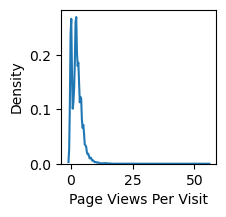

In [18]:
plt.figure(figsize=(2,2))
sns.kdeplot(lead_df1['Page Views Per Visit'])
plt.show()

Observation: The data of Page Views Per Visit is a highly skewed data, hence its relevance in the overall analysis needs to be scrutinized.

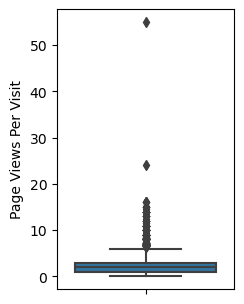

In [19]:
plt.figure(figsize=(16, 8))
plt.subplot(2,6,2)
sns.boxplot(y = 'Page Views Per Visit', data = lead_df1)
plt.show()

Observation: The data of Page Views Per Visit is having huge number of outliers, hence its relevance in the overall analysis needs to be scrutinized.

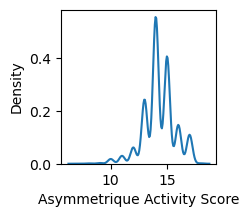

In [20]:
##Looking at Skewness
plt.figure(figsize=(2,2))
sns.kdeplot(lead_df1['Asymmetrique Activity Score'])
plt.show()

Observation: The data of Asymmetrique Activity Score is a moderately skewed data, hence its relevance in the overall analysis should be considered.

In [21]:
plt.figure(figsize=(16, 8))
plt.subplot(2,6,2)
sns.boxplot(y = 'Asymmetrique Activity Score', data = lead_df1)
plt.show()

Observation: The data of Asymmetrique Activity Score is a having moderate number of outliers, hence its relevance in the overall analysis should be considered.

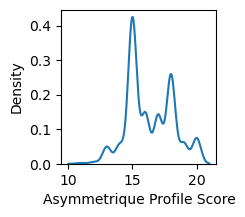

In [22]:
##Looking at Skewness
plt.figure(figsize=(2,2))
sns.kdeplot(lead_df1['Asymmetrique Profile Score'])
plt.show()

Observation: The data of Asymmetrique Profile Score is a less skewed data as compared to the above attribute, hence its relevance in the overall analysis should be considered.

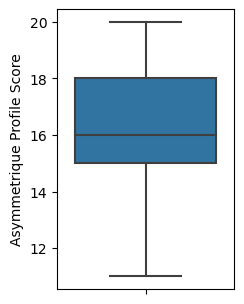

In [23]:
plt.figure(figsize=(16, 8))
plt.subplot(2,6,2)
sns.boxplot(y = 'Asymmetrique Profile Score', data = lead_df1)
plt.show()

Observation: The data of Asymmetrique Profile Score is having no outliers at all, hence its relevance in the overall analysis should be considered.

#### 1.3.2 Null values

In [24]:
lead_df1.isnull().sum()

Prospect ID                                                                   0
Lead Number                                                                   0
Do Not Email                                                                  0
Do Not Call                                                                   0
Converted                                                                     0
Page Views Per Visit                                                        137
Country                                                                    2461
Search                                                                        0
X Education Forums                                                            0
Newspaper                                                                     0
Digital Advertisement                                                         0
Through Recommendations                                                       0
Receive More Updates About Our Courses  

##### 1.3.2.1 Checking the percentage of missing values only for relevant columns

In [25]:
round(100*(lead_df1[['Asymmetrique Activity Score', 'Asymmetrique Profile Score','Page Views Per Visit']].isnull().sum()/len(lead_df1[['Asymmetrique Activity Score', 'Asymmetrique Profile Score', 'Page Views Per Visit']].index)),2)

Asymmetrique Activity Score   45.65000
Asymmetrique Profile Score    45.65000
Page Views Per Visit           1.48000
dtype: float64

In [26]:
lead_df1 = lead_df1[~np.isnan(lead_df1['Page Views Per Visit'])]

In [27]:
lead_df1.shape

(9103, 100)

In [29]:
lead_df1.isnull().sum()

Prospect ID                                                                   0
Lead Number                                                                   0
Do Not Email                                                                  0
Do Not Call                                                                   0
Converted                                                                     0
Page Views Per Visit                                                          0
Country                                                                    2324
Search                                                                        0
X Education Forums                                                            0
Newspaper                                                                     0
Digital Advertisement                                                         0
Through Recommendations                                                       0
Receive More Updates About Our Courses  

In [30]:
lead_df1= lead_df1.drop(['City','Country'],axis=1)

In [31]:
lead_df2 = lead_df1[~np.isnan(lead_df1['Asymmetrique Activity Score'])]
lead_df2 = lead_df1[~np.isnan(lead_df1['Asymmetrique Profile Score'])]

In [32]:
lead_df2.isnull().sum()

Prospect ID                                                                0
Lead Number                                                                0
Do Not Email                                                               0
Do Not Call                                                                0
Converted                                                                  0
Page Views Per Visit                                                       0
Search                                                                     0
X Education Forums                                                         0
Newspaper                                                                  0
Digital Advertisement                                                      0
Through Recommendations                                                    0
Receive More Updates About Our Courses                                     0
Update me on Supply Chain Content                                          0

In [50]:
lead_df2.shape

(4935, 98)

## 2. Data Modelling


### 2.1 Test-train split

In [33]:
#Putting feature variable to X
X= lead_df2.drop(['Prospect ID','Lead Number','Converted'],axis=1)
X.head()

Do Not Email  Do Not Call  Page Views Per Visit  Search  \
0             0            0               0.00000       0   
1             0            0               2.50000       0   
2             0            0               2.00000       0   
3             0            0               1.00000       0   
4             0            0               1.00000       0   

   X Education Forums  Newspaper  Digital Advertisement  \
0                   0          0                      0   
1                   0          0                      0   
2                   0          0                      0   
3                   0          0                      0   
4                   0          0                      0   

   Through Recommendations  Receive More Updates About Our Courses  \
0                        0                                       0   
1                        0                                       0   
2                        0                                       0   
3                        0                                       0   
4                        0                                       0   

   Update me on Supply Chain Content  Get updates on DM Content  \
0                                  0                          0   
1                                  0                          0   
2                                  0                          0   
3                                  0                          0   
4                                  0                          0   

   Asymmetrique Activity Score  Asymmetrique Profile Score  \
0                     15.00000                    15.00000   
1                     15.00000                    15.00000   
2                     14.00000                    20.00000   
3                     13.00000                    17.00000   
4                     15.00000                    18.00000   

   I agree to pay the amount through cheque  \
0                                         0   
1                                         0   
2                                         0   
3                                         0   
4                                         0   

   A free copy of Mastering The Interview  Lead Origin_API  \
0                                       0                1   
1                                       0                1   
2                                       1                0   
3                                       0                0   
4                                       0                0   

   Lead Origin_Landing Page Submission  Lead Origin_Lead Add Form  \
0                                    0                          0   
1                                    0                          0   
2                                    1                          0   
3                                    1                          0   
4                                    1                          0   

   Lead Origin_Lead Import  Lead Origin_Quick Add Form  \
0                        0                           0   
1                        0                           0   
2                        0                           0   
3                        0                           0   
4                        0                           0   

   Specialization_Banking, Investment And Insurance  \
0                                                 0   
1                                                 0   
2                                                 0   
3                                                 0   
4                                                 0   

   Specialization_Business Administration  Specialization_E-Business  \
0                                       0                          0   
1                                       0                          0   
2                                       1                          0   
3                                      

In [34]:
#Putting response variable to y
y=lead_df2['Converted']
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [35]:
#Splitting data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size = 0.7, test_size = 0.3)

In [36]:
X_train.shape

(3454, 95)

In [37]:
X_test.shape

(1481, 95)

In [38]:
X_train.head()

Do Not Email  Do Not Call  Page Views Per Visit  Search  \
1510             0            0               1.00000       0   
9023             0            0               6.00000       0   
7643             1            0               1.00000       0   
3573             0            0               8.00000       0   
2365             0            0               2.00000       0   

      X Education Forums  Newspaper  Digital Advertisement  \
1510                   0          0                      0   
9023                   0          0                      0   
7643                   0          0                      0   
3573                   0          0                      0   
2365                   0          0                      0   

      Through Recommendations  Receive More Updates About Our Courses  \
1510                        0                                       0   
9023                        0                                       0   
7643                        0                                       0   
3573                        0                                       0   
2365                        0                                       0   

      Update me on Supply Chain Content  Get updates on DM Content  \
1510                                  0                          0   
9023                                  0                          0   
7643                                  0                          0   
3573                                  0                          0   
2365                                  0                          0   

      Asymmetrique Activity Score  Asymmetrique Profile Score  \
1510                     14.00000                    18.00000   
9023                     10.00000                    16.00000   
7643                     16.00000                    13.00000   
3573                     15.00000                    20.00000   
2365                     13.00000                    15.00000   

      I agree to pay the amount through cheque  \
1510                                         0   
9023                                         0   
7643                                         0   
3573                                         0   
2365                                         0   

      A free copy of Mastering The Interview  Lead Origin_API  \
1510                                       0                1   
9023                                       0                1   
7643                                       0                0   
3573                                       1                0   
2365                                       0                1   

      Lead Origin_Landing Page Submission  Lead Origin_Lead Add Form  \
1510                                    0                          0   
9023                                    0                          0   
7643                                    1                          0   
3573                                    1                          0   
2365                                    0                          0   

      Lead Origin_Lead Import  Lead Origin_Quick Add Form  \
1510                        0                           0   
9023                        0                           0   
7643                        0                           0   
3573                        0                           0   
2365                        0                           0   

      Specialization_Banking, Investment And Insurance  \
1510                                                 0   
9023                                                 0   
7643                                                 0   
3573                                                 0   
2365                                                 0   

      Specialization_Business Administration  Specialization_E-Business  \
1510                                       0                          0   


### 2.2 Scaling the data

In [40]:
from sklearn.preprocessing import StandardScaler

In [41]:
scaler = StandardScaler()
X_train [['Page Views Per Visit', 'Asymmetrique Activity Score','Asymmetrique Profile Score']] = scaler.fit_transform(X_train[['Page Views Per Visit', 'Asymmetrique Activity Score','Asymmetrique Profile Score']])
X_train.head()

Do Not Email  Do Not Call  Page Views Per Visit  Search  \
1510             0            0              -0.62505       0   
9023             0            0               1.58232       0   
7643             1            0              -0.62505       0   
3573             0            0               2.46527       0   
2365             0            0              -0.18358       0   

      X Education Forums  Newspaper  Digital Advertisement  \
1510                   0          0                      0   
9023                   0          0                      0   
7643                   0          0                      0   
3573                   0          0                      0   
2365                   0          0                      0   

      Through Recommendations  Receive More Updates About Our Courses  \
1510                        0                                       0   
9023                        0                                       0   
7643                        0                                       0   
3573                        0                                       0   
2365                        0                                       0   

      Update me on Supply Chain Content  Get updates on DM Content  \
1510                                  0                          0   
9023                                  0                          0   
7643                                  0                          0   
3573                                  0                          0   
2365                                  0                          0   

      Asymmetrique Activity Score  Asymmetrique Profile Score  \
1510                     -0.21900                     0.93001   
9023                     -3.07343                    -0.18265   
7643                      1.20822                    -1.85165   
3573                      0.49461                     2.04268   
2365                     -0.93261                    -0.73899   

      I agree to pay the amount through cheque  \
1510                                         0   
9023                                         0   
7643                                         0   
3573                                         0   
2365                                         0   

      A free copy of Mastering The Interview  Lead Origin_API  \
1510                                       0                1   
9023                                       0                1   
7643                                       0                0   
3573                                       1                0   
2365                                       0                1   

      Lead Origin_Landing Page Submission  Lead Origin_Lead Add Form  \
1510                                    0                          0   
9023                                    0                          0   
7643                                    1                          0   
3573                                    1                          0   
2365                                    0                          0   

      Lead Origin_Lead Import  Lead Origin_Quick Add Form  \
1510                        0                           0   
9023                        0                           0   
7643                        0                           0   
3573                        0                           0   
2365                        0                           0   

      Specialization_Banking, Investment And Insurance  \
1510                                                 0   
9023                                                 0   
7643                                                 0   
3573                                                 0   
2365                                                 0   

      Specialization_Business Administration  Specialization_E-Business  \
1510                                       0                          0   


In [42]:
#Checking the lead conversion rate
lead_conversion=(sum(lead_df2['Converted'])/len(lead_df2['Converted'].index))*100
lead_conversion

37.54812563323202

### 2.3 Data Correlations

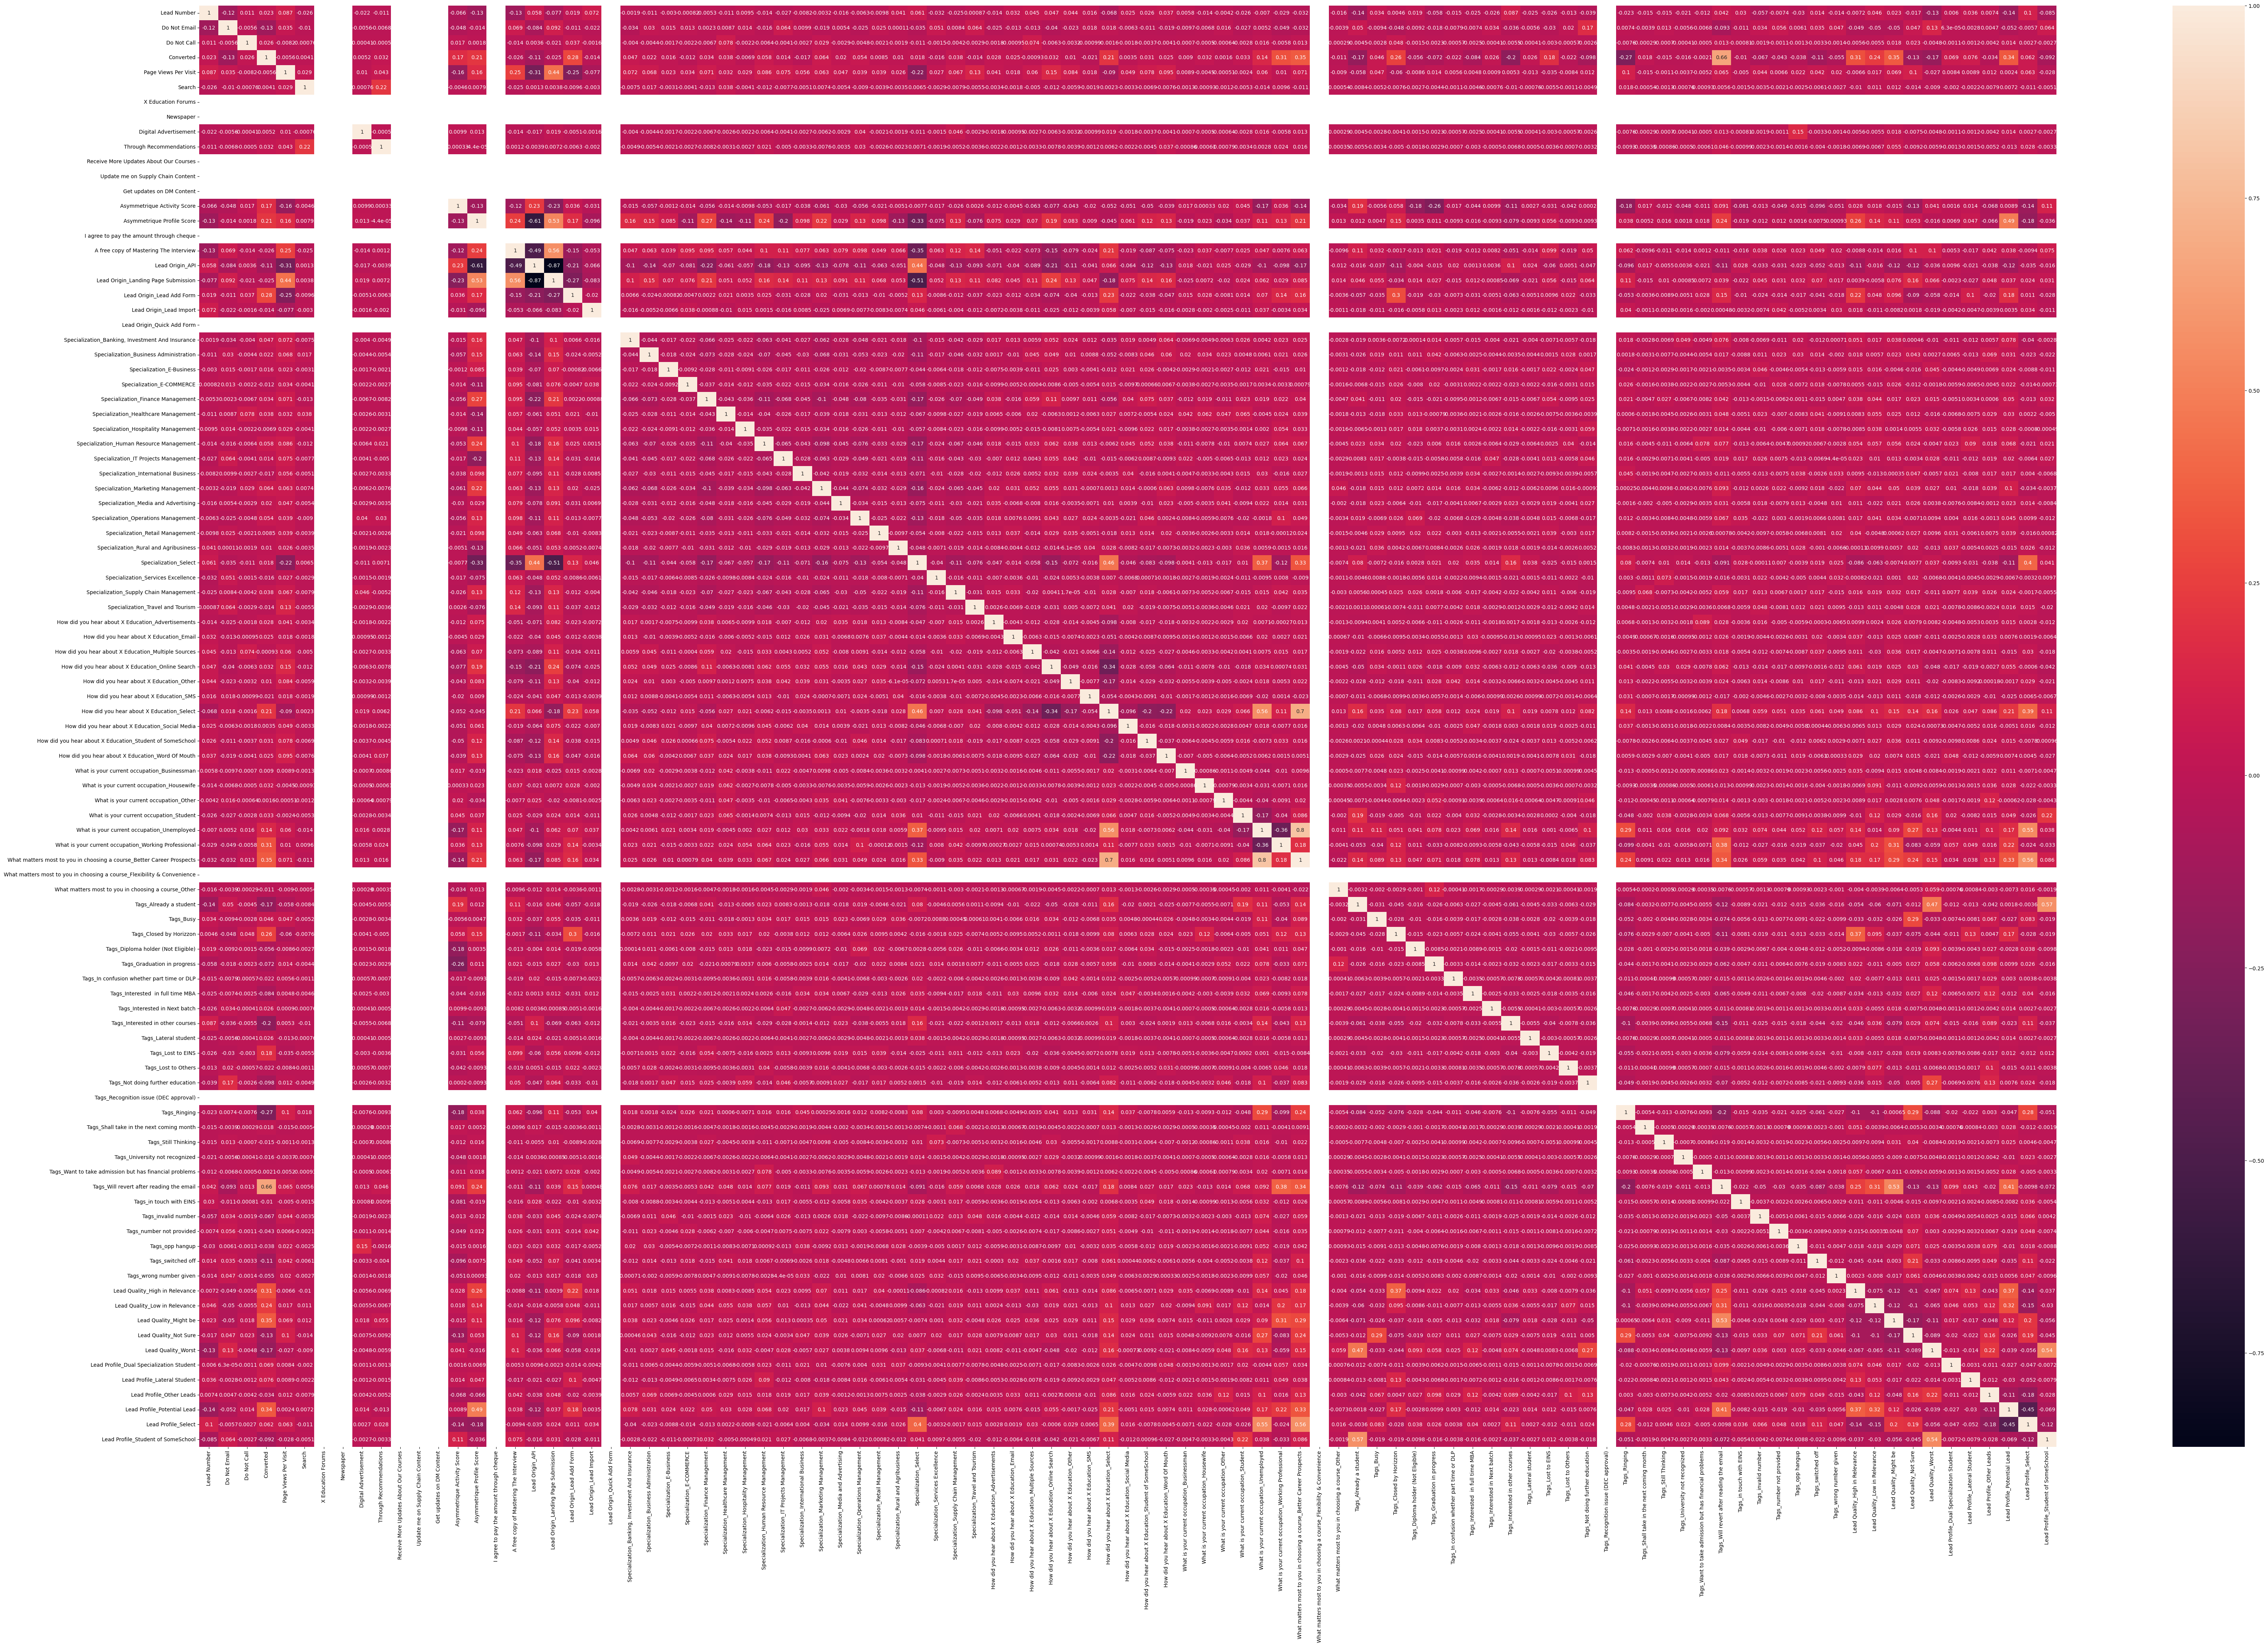

In [51]:
plt.figure(figsize = (80,50)) 
matrix = np.triu(lead_df2.corr())
sns.heatmap (lead_df2.corr(),annot=True)
plt.show()

In [52]:
lead_df2.corr()

Lead Number  Do Not Email  \
Lead Number                                             1.00000      -0.11921   
Do Not Email                                           -0.11921       1.00000   
Do Not Call                                             0.01071      -0.00557   
Converted                                               0.02298      -0.13153   
Page Views Per Visit                                    0.08740       0.03528   
Search                                                 -0.02551      -0.01043   
X Education Forums                                          NaN           NaN   
Newspaper                                                   NaN           NaN   
Digital Advertisement                                  -0.02197      -0.00557   
Through Recommendations                                -0.01125      -0.00682   
Receive More Updates About Our Courses                      NaN           NaN   
Update me on Supply Chain Content                           NaN           NaN   
Get updates on DM Content                                   NaN           NaN   
Asymmetrique Activity Score                            -0.06579      -0.04834   
Asymmetrique Profile Score                             -0.12756      -0.01449   
I agree to pay the amount through cheque                    NaN           NaN   
A free copy of Mastering The Interview                 -0.12700       0.06939   
Lead Origin_API                                         0.05782      -0.08392   
Lead Origin_Landing Page Submission                    -0.07737       0.09164   
Lead Origin_Lead Add Form                               0.01865      -0.01144   
Lead Origin_Lead Import                                 0.07249      -0.02200   
Lead Origin_Quick Add Form                                  NaN           NaN   
Specialization_Banking, Investment And Insurance       -0.00188      -0.03448   
Specialization_Business Administration                 -0.01108       0.02956   
Specialization_E-Business                              -0.00304       0.01508   
Specialization_E-COMMERCE                              -0.00082       0.01308   
Specialization_Finance Management                      -0.00526       0.00227   
Specialization_Healthcare Management                   -0.01140       0.00868   
Specialization_Hospitality Management                   0.00952       0.01371   
Specialization_Human Resource Management               -0.01369      -0.01645   
Specialization_IT Projects Management                  -0.02679       0.06394   
Specialization_International Business                  -0.00819       0.00989   
Specialization_Marketing Management                    -0.00322      -0.01858   
Specialization_Media and Advertising                   -0.01621       0.00539   
Specialization_Operations Management                   -0.00626      -0.02456   
Specialization_Retail Management                       -0.00982       0.02471   
Specialization_Rural and Agribusiness                   0.04087       0.00011   
Specialization_Select                                   0.06060      -0.03531   
Specialization_Services Excellence                     -0.03160       0.05093   
Specialization_Supply Chain Management                 -0.02506       0.00836   
Specialization_Travel and Tourism                       0.00087       0.06438   
How did you hear about X Education_Advertisements      -0.01396      -0.02501   
How did you hear about X Education_Email                0.03161      -0.01308   
How did you hear about X Education_Multiple Sou...      0.04541      -0.01275   
How did you hear about X Education_Online Search        0.04653      -0.04032   
How did you hear about X Education_Other                0.04431      -0.02267   
How did you hear about X Education_SMS                  0.01603       0.01835   
How did you hear about X Education_Select              -0.06821       0.01767   
How did you hear about X Education_Social Media         0.02520      -0.00634   
Ho

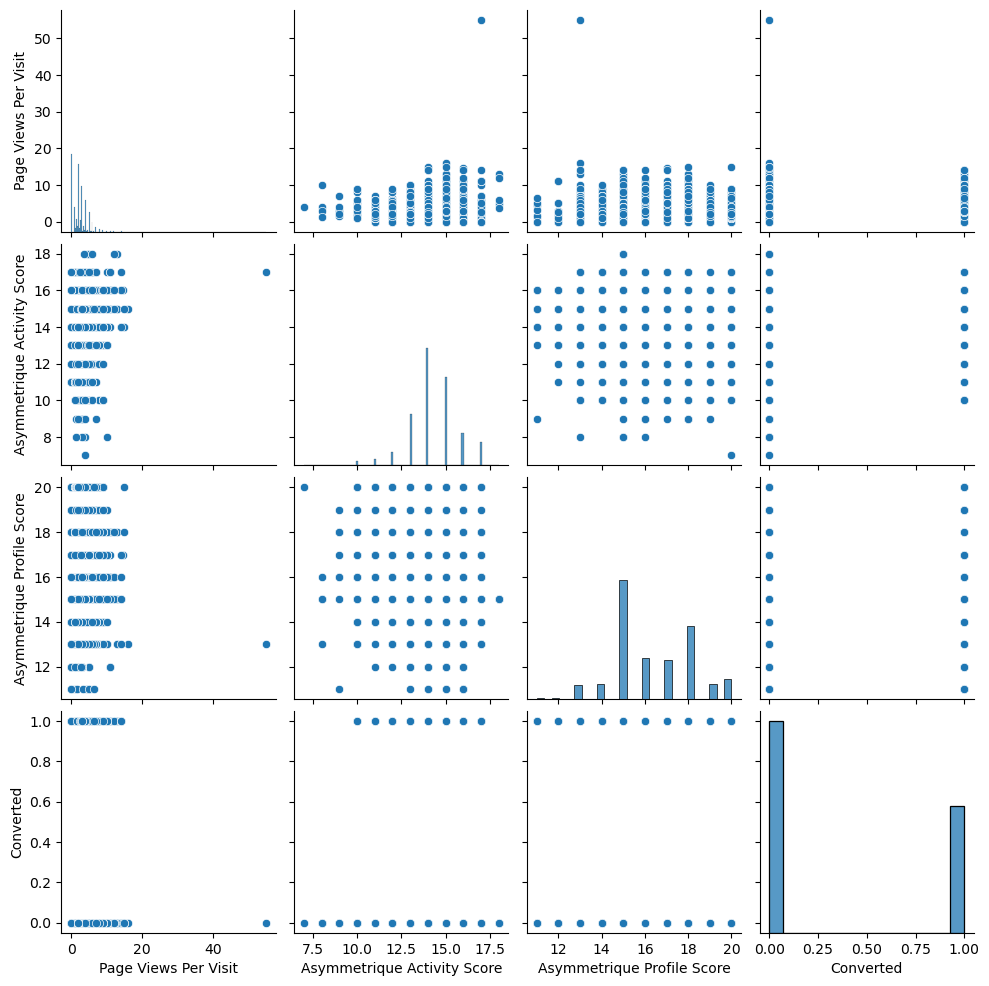

In [44]:
sns.pairplot(data=lead_df2,vars=['Page Views Per Visit', 'Asymmetrique Activity Score','Asymmetrique Profile Score', 'Converted'])
plt.show()

In [45]:
lead_df2.corr()

Lead Number  Do Not Email  \
Lead Number                                             1.00000      -0.11921   
Do Not Email                                           -0.11921       1.00000   
Do Not Call                                             0.01071      -0.00557   
Converted                                               0.02298      -0.13153   
Page Views Per Visit                                    0.08740       0.03528   
Search                                                 -0.02551      -0.01043   
X Education Forums                                          NaN           NaN   
Newspaper                                                   NaN           NaN   
Digital Advertisement                                  -0.02197      -0.00557   
Through Recommendations                                -0.01125      -0.00682   
Receive More Updates About Our Courses                      NaN           NaN   
Update me on Supply Chain Content                           NaN           NaN   
Get updates on DM Content                                   NaN           NaN   
Asymmetrique Activity Score                            -0.06579      -0.04834   
Asymmetrique Profile Score                             -0.12756      -0.01449   
I agree to pay the amount through cheque                    NaN           NaN   
A free copy of Mastering The Interview                 -0.12700       0.06939   
Lead Origin_API                                         0.05782      -0.08392   
Lead Origin_Landing Page Submission                    -0.07737       0.09164   
Lead Origin_Lead Add Form                               0.01865      -0.01144   
Lead Origin_Lead Import                                 0.07249      -0.02200   
Lead Origin_Quick Add Form                                  NaN           NaN   
Specialization_Banking, Investment And Insurance       -0.00188      -0.03448   
Specialization_Business Administration                 -0.01108       0.02956   
Specialization_E-Business                              -0.00304       0.01508   
Specialization_E-COMMERCE                              -0.00082       0.01308   
Specialization_Finance Management                      -0.00526       0.00227   
Specialization_Healthcare Management                   -0.01140       0.00868   
Specialization_Hospitality Management                   0.00952       0.01371   
Specialization_Human Resource Management               -0.01369      -0.01645   
Specialization_IT Projects Management                  -0.02679       0.06394   
Specialization_International Business                  -0.00819       0.00989   
Specialization_Marketing Management                    -0.00322      -0.01858   
Specialization_Media and Advertising                   -0.01621       0.00539   
Specialization_Operations Management                   -0.00626      -0.02456   
Specialization_Retail Management                       -0.00982       0.02471   
Specialization_Rural and Agribusiness                   0.04087       0.00011   
Specialization_Select                                   0.06060      -0.03531   
Specialization_Services Excellence                     -0.03160       0.05093   
Specialization_Supply Chain Management                 -0.02506       0.00836   
Specialization_Travel and Tourism                       0.00087       0.06438   
How did you hear about X Education_Advertisements      -0.01396      -0.02501   
How did you hear about X Education_Email                0.03161      -0.01308   
How did you hear about X Education_Multiple Sou...      0.04541      -0.01275   
How did you hear about X Education_Online Search        0.04653      -0.04032   
How did you hear about X Education_Other                0.04431      -0.02267   
How did you hear about X Education_SMS                  0.01603       0.01835   
How did you hear about X Education_Select              -0.06821       0.01767   
How did you hear about X Education_Social Media         0.02520      -0.00634   
Ho

### 2.4 Model Building

In [46]:
import statsmodels.api as sm

In [47]:
#Logistics Regression Model 
logm1 = sm.GLM (y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 3454
Model:                            GLM   Df Residuals:                     3369
Model Family:                Binomial   Df Model:                           84
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Sun, 12 Mar 2023   Deviance:                       35828.
Time:                        22:22:03   Pearson chi2:                 1.75e+18
No. Iterations:                   100   Pseudo R-squ. (CS):                nan
Covariance Type:            nonrobust                                         
===========================================================================================================================================
                                                                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------------------------------
const                                                                   -1.284e+15    4.5e+06  -2.85e+08      0.000   -1.28e+15   -1.28e+15
Do Not Email                                                            -1.303e+14   4.72e+06  -2.76e+07      0.000    -1.3e+14    -1.3e+14
Do Not Call                                                              2.725e+15   6.83e+07   3.99e+07      0.000    2.72e+15    2.72e+15
Page Views Per Visit                                                      1.56e+14   1.33e+06   1.18e+08      0.000    1.56e+14    1.56e+14
Search                                                                   6.117e+14   2.84e+07   2.15e+07      0.000    6.12e+14    6.12e+14
X Education Forums                                                        324.6477   1.99e-06   1.63e+08      0.000     324.648     324.648
Newspaper                                                                -135.3550   1.12e-06  -1.21e+08      0.000    -135.355    -135.355
Digital Advertisement                                                    3.169e+16   6.76e+07   4.69e+08      0.000    3.17e+16    3.17e+16
Through Recommendations                                                  8.183e+15   4.02e+07   2.04e+08      0.000    8.18e+15    8.18e+15
Receive More Updates About Our Courses                                     14.9789   1.98e-07   7.58e+07      0.000      14.979      14.979
Update me on Supply Chain Content                                        -155.6315   3.36e-07  -4.63e+08      0.000    -155.632    -155.632
Get updates on DM Content                                                  30.4338   1.72e-07   1.77e+08      0.000      30.434      30.434
Asymmetrique Activity Score                                             -2.171e+14   1.39e+06  -1.56e+08      0.000   -2.17e+14   -2.17e+14
Asymmetrique Profile Score                                              -1.216e+14   2.79e+06  -4.36e+07      0.000   -1.22e+14   -1.22e+14
I agree to pay the amount through cheque                                    1.1732   1.91e-07   6.16e+06      0.000       1.173       1.173
A free copy of Mastering The Interview                                  -6.245e+13   4.31e+06  -1.45e+07      0.000   -6.24e+13   -6.24e+13
Lead Origin_API                                                         -4.657e+14   3.97e+06  -1.17e+08      0.000   -4.66e+14   -4.66e+14
Lead Origin_Landing Page Submission                                     -3.058e+14   5.11e+06  -5.98e+07      0.000   -3.06e+14   -3.06e+14
Lead Origin_Lead Add Form                                                2.836e+13   5.68e+06      5e+06      0.000    2.84e+13    2.84e+13
Lea